# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities


605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# pprint(query_url)

limit = 0
lat = []
temp = []
date = []
humd = []
wind = []
cloud = []
city = []

# Make a request for each of the indices
for x in range(len(cities)):
    print(f"Making request number: {x} for ID: {cities[x]}")
    response = requests.get(query_url + cities[x]).json()

#     pprint(response)
    try:
        if response['coord']['lat'] == " ":
            print("value error pass")
        elif response['dt'] == " ":
            print("value error pass")
        elif response['main']['temp_max'] == " ":
            print("value error pass")
        elif response['main']['humidity'] == " ":
            print("value error pass")
        elif response['wind']['speed'] == " ":
            print("value error pass")
        elif response['clouds']['all'] == " ":
            print("value error pass")
        else:
            city.append(cities[x])
            lat.append(response['coord']['lat'])
            date.append(response['dt'])
            temp.append(response['main']['temp_max'])
            humd.append(response['main']['humidity'])
            wind.append(response['wind']['speed'])
            cloud.append(response['clouds']['all'])
    except:
        print("value error pass")
        
    limit += 1
    if limit == 5: break
    time.sleep(1)
    
#     else:
#         city.append(cities[x])
#         lat.append(response['coord']['lat'])
#         date.append(response['dt'])
#         temp.append(response['main']['temp_max'])
#         humd.append(response['main']['humidity'])
#         wind.append(response['wind']['speed'])
#         cloud.append(response['clouds']['all'])
    
    
#     try:
#         city.append(cities[x])
#         lat.append(response['coord']['lat'])
#         date.append(response['dt'])
#         temp.append(response['main']['temp_max'])
#         humd.append(response['main']['humidity'])
#         wind.append(response['wind']['speed'])
#         cloud.append(response['clouds']['all'])
#     except:
#         print("value error pass")
#     limit += 1
#     if limit == 5: break
#     time.sleep(1)
#     weather_df = {
#         "city": city,
#         "lat": lat,
#         "temp": temp,
#         "humd": humd,
#         "wind": wind,
#         "cloud": cloud]
#         }
#     weather_data = pd.DataFrame(weather_df)


Making request number: 0 for ID: longyearbyen
Making request number: 1 for ID: tashla
Making request number: 2 for ID: castro
Making request number: 3 for ID: surab
Making request number: 4 for ID: lebu


In [ ]:
print(cloud)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Export the city data into a .csv

# create a data frame from cities, lat, and temp
weather_df = dict({
    "city": city,
    "date": date,
    "lat": lat,
    "temp": temp,
    "humd": humd,
    "wind": wind,
    "cloud": cloud
})

weather_data = pd.DataFrame.from_dict(weather_df)
# weather_data = weather_data.transpose()
weather_data.to_csv("Weather_Data.csv", index=False)
weather_data.head()

,city,date,lat,temp,humd,wind,cloud
0,longyearbyen,1613016597,78.2186,5.00,66,20.71,75
1,tashla,1613016598,51.7716,16.92,97,6.38,100
2,castro,1613016599,-24.7911,61.14,96,7.40,100
3,surab,1613016601,28.4914,52.27,33,9.22,56
4,lebu,1613016602,-37.6167,59.00,96,9.17,6


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#  Get the indices of cities that have humidity over 100%.

humidityover = weather_data.loc[weather_data['humd'] > 100]
print(humidityover)


# index = weather_data.index
# humidityover = weather_data["humd"] > 100
# humdindices = index[humidityover] get only rows with > 100
# indices_list = humdindices.tolist()
# print(indices_list)


Empty DataFrame
Columns: [city, date, lat, temp, humd, wind, cloud]
Index: []


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

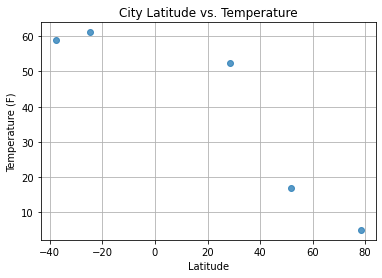

In [15]:
# scatter plot
plt.scatter(weather_data["lat"],weather_data["temp"], marker="o", alpha = 0.75)

# labels and ttile
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("latandtemp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

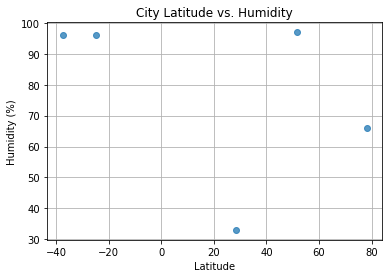

In [16]:
# scatter plot
plt.scatter(weather_data["lat"],weather_data["humd"], marker="o", alpha = 0.75)

# labels and title
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("latandhumd.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

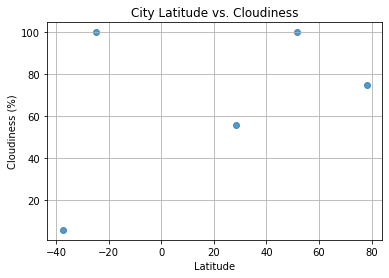

In [17]:
# scatter plot
plt.scatter(weather_data["lat"],weather_data["cloud"], marker="o", alpha = 0.75)

# labels and title
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("latandcloud.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

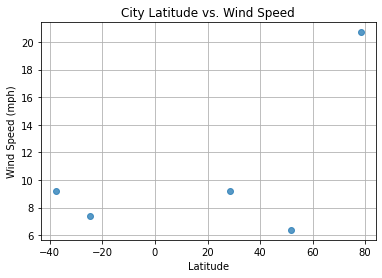

In [18]:
# scatter plot
plt.scatter(weather_data["lat"],weather_data["wind"], marker="o", alpha = 0.75)

# labels and title
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("latandwind.png")

# Show plot
plt.show()

## Linear Regression

In [26]:
# northern hemisphre is north of equater, while southern hemishere is south of equator. sciencing.com(2018)
northern = weather_data.loc[weather_data["lat"] >= 0.0]
northern.reset_index(inplace=True)

southern = weather_data.loc[weather_data["lat"] < 0.0]
southern.reset_index(inplace=True)



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.9037347745313764


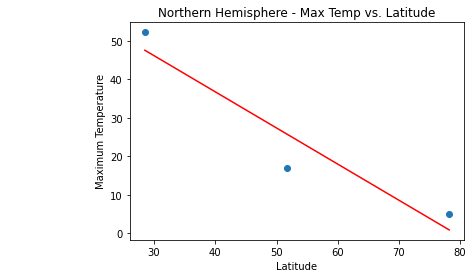

In [35]:
# assign x and y values
x_values = northern["lat"]
y_values = northern["temp"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Maximum Temperature')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Max Temp vs. Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 1.0


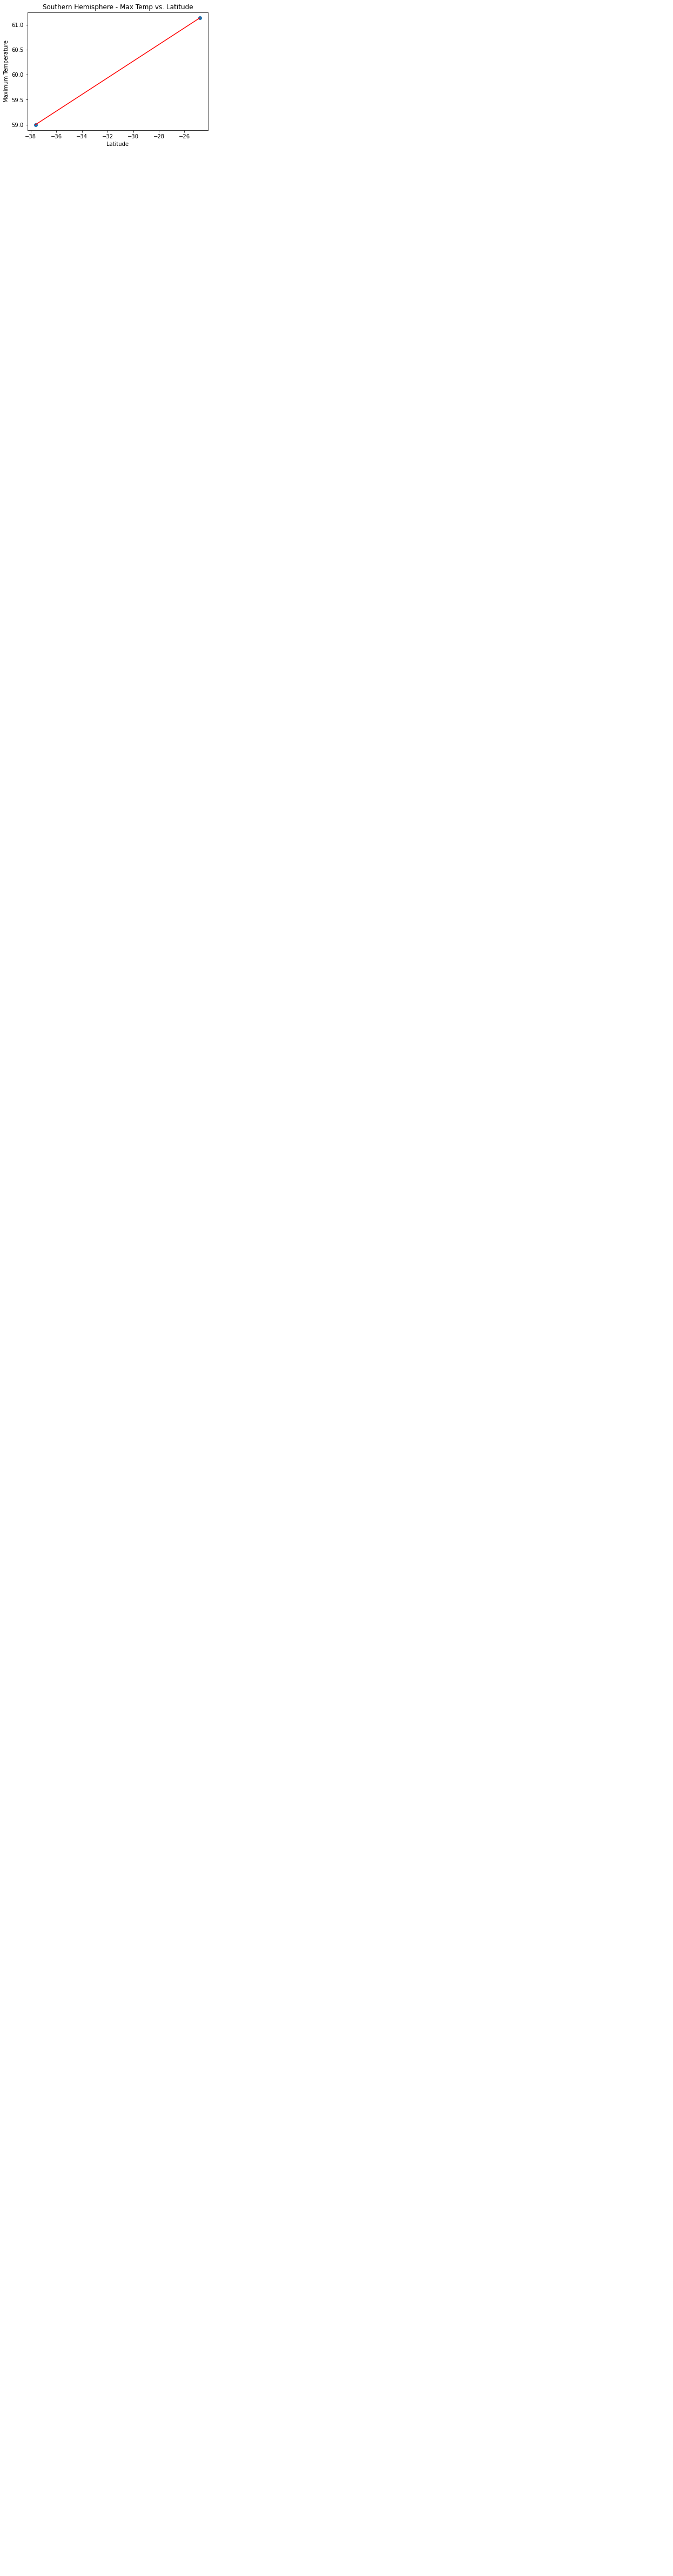

In [36]:
## assign x and y values
x_values = southern["lat"]
y_values = southern["temp"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Maximum Temperature')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Max Temp vs. Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.2339747229295072


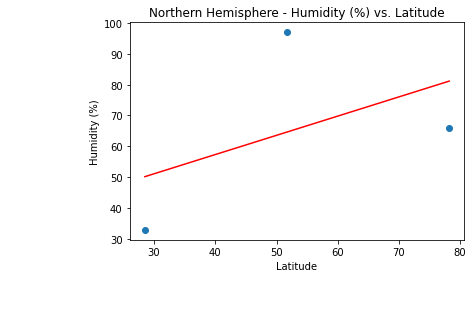

In [37]:
# assign x and y values
x_values = northern["lat"]
y_values = northern["humd"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.0


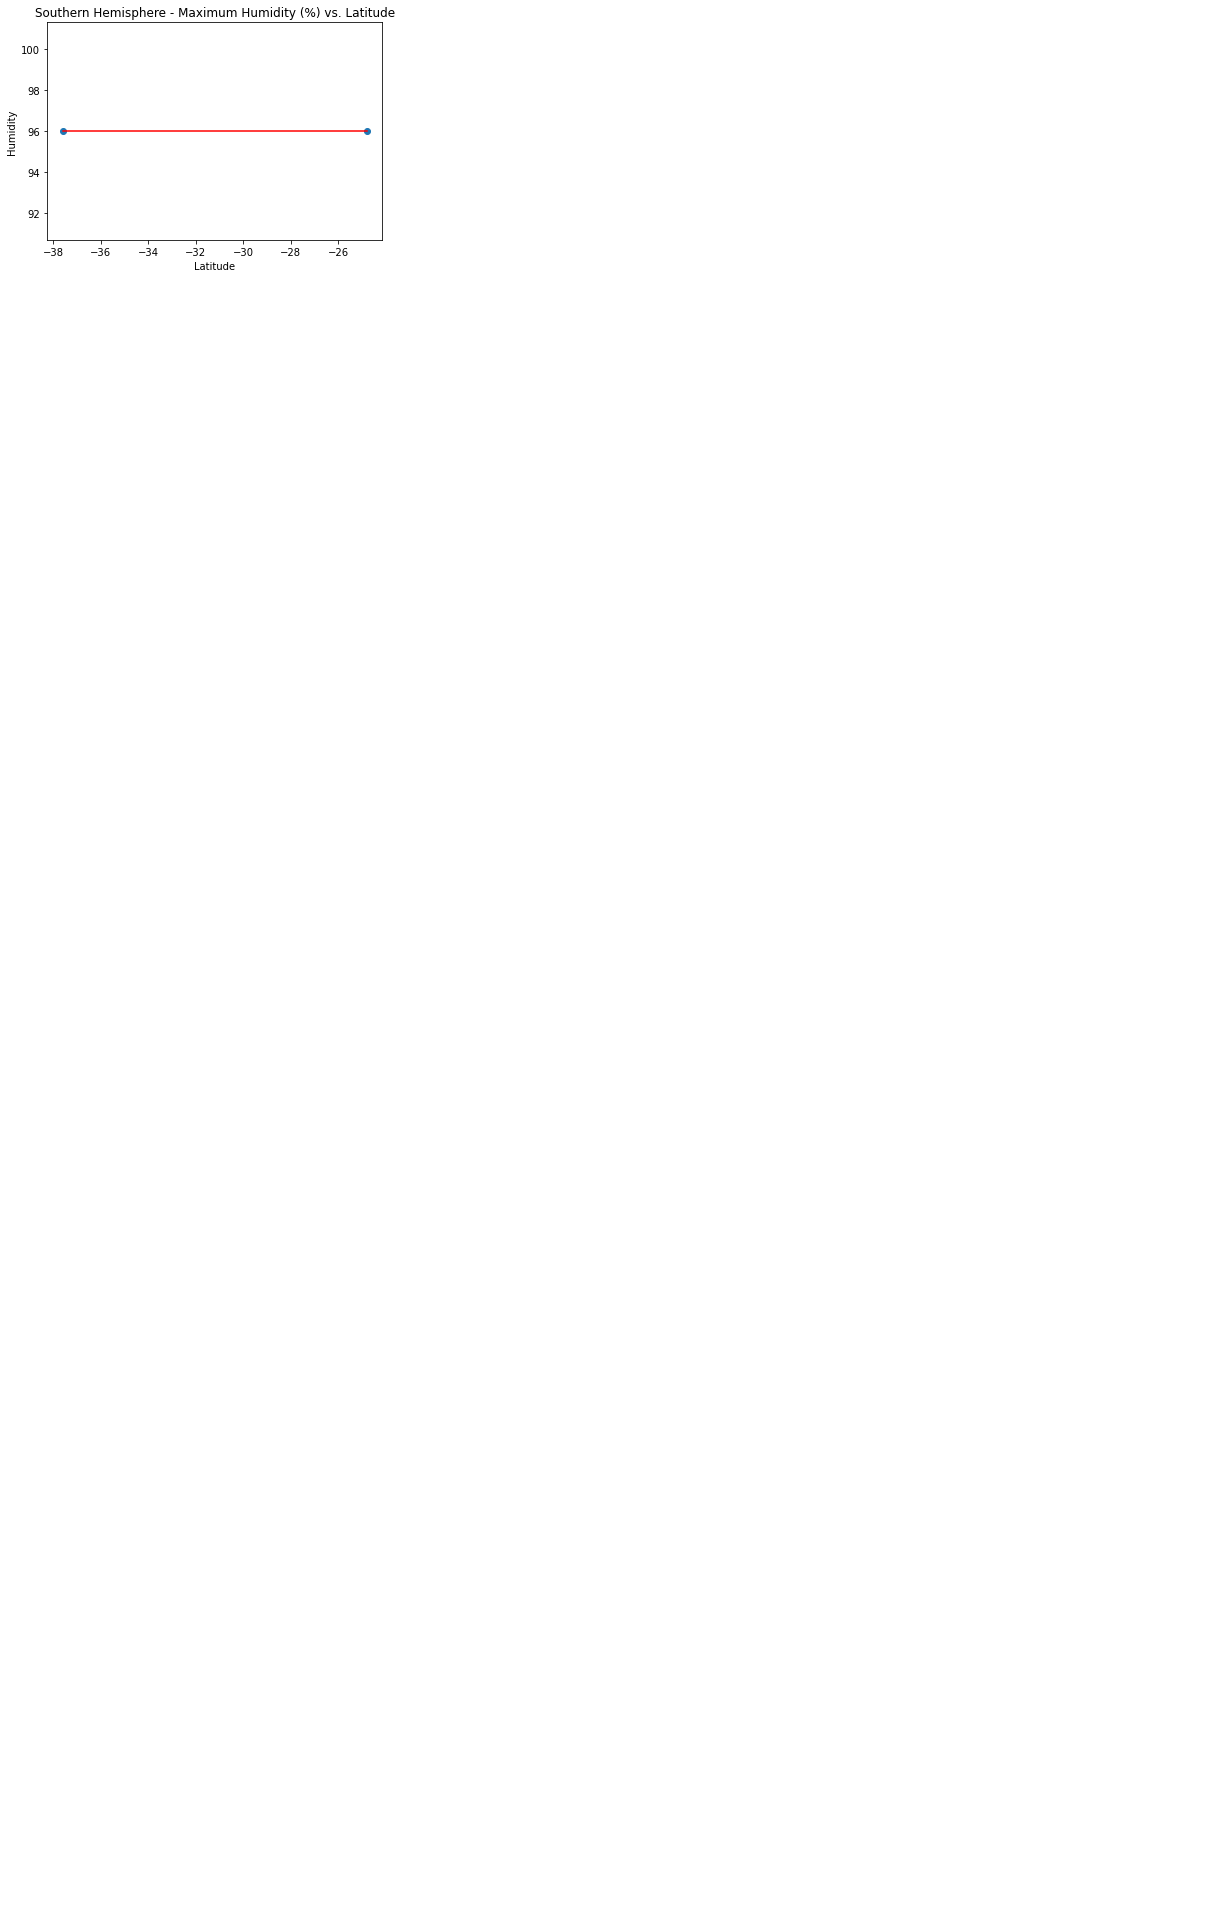

In [39]:
# assign x and y values
x_values = southern["lat"]
y_values = southern["humd"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot

plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Maximum Humidity (%) vs. Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.15763395517096526


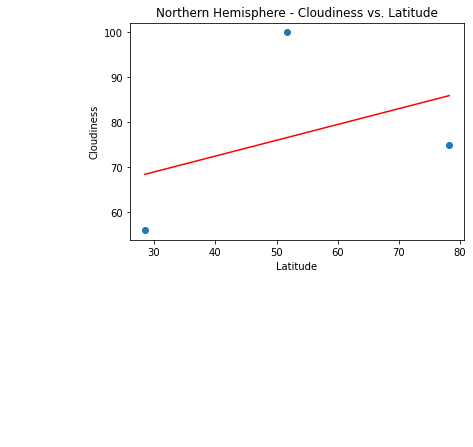

In [40]:
# assign x and y values
x_values = northern["lat"]
y_values = northern["cloud"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 1.0


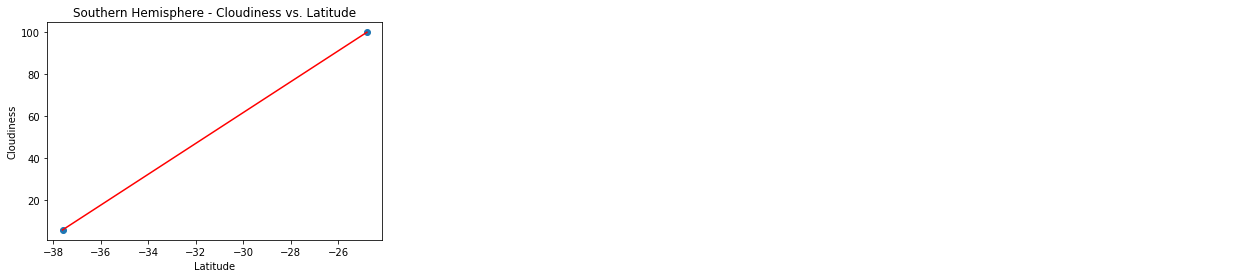

In [42]:
# assign x and y values
x_values = southern["lat"]
y_values = southern["cloud"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.6094019667106296


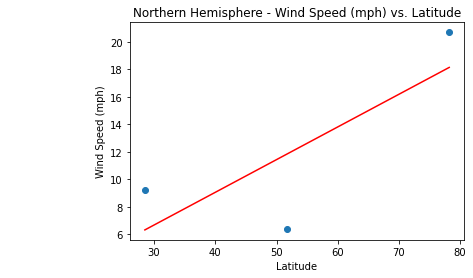

In [43]:
# assign x and y values
x_values = northern["lat"]
y_values = northern["wind"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 1.0


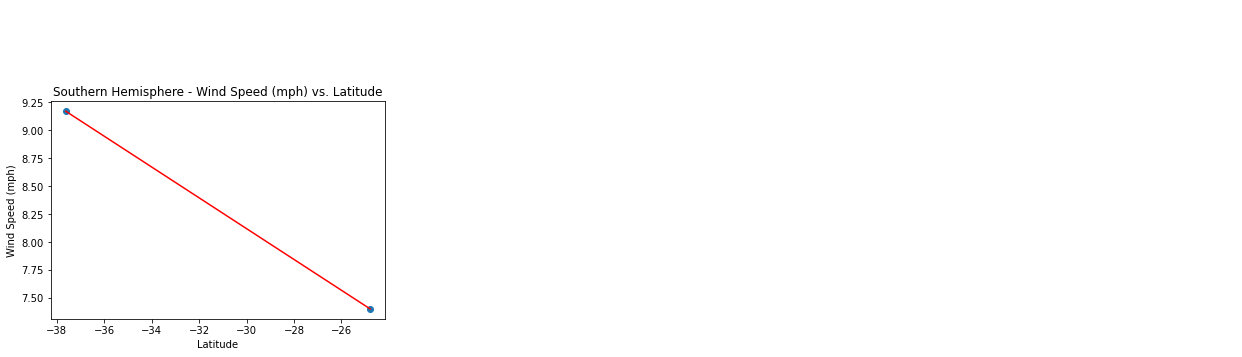

In [44]:
# assign x and y values
x_values = southern["lat"]
y_values = southern["wind"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()